<a href="https://colab.research.google.com/github/svyas19/IBM-Data-Science-Professional-Certificate/blob/main/Visualizing_Crimes_in_San_Francisco_%26_Analyzing_Audience_Interest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will generate two visualization plots.</br>
 


1.   The first one will be a plot to summarize the results of a survey that was conducted to gauge an audience interest in different data science topics.

2.   The second plot is a Choropleth map of the crime rate in San Francisco.



In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
df_sur = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Topic_Survey_Assignment.csv")

In [ ]:
df_sur.head()

Very interested  Somewhat interested  \
Big Data (Spark / Hadoop)              1332                  729   
Data Analysis / Statistics             1688                  444   
Data Journalism                         429                 1081   
Data Visualization                     1340                  734   
Deep Learning                          1263                  770   

                            Not interested  
Big Data (Spark / Hadoop)              127  
Data Analysis / Statistics              60  
Data Journalism                        610  
Data Visualization                     102  
Deep Learning                          136

In [ ]:
df_sur.shape

(6, 3)

In [ ]:
df_sur.sort_values(by="Very interested", ascending=False,inplace=True)

In [ ]:
df_sur.head()

Very interested  Somewhat interested  \
Data Analysis / Statistics             1688                  444   
Machine Learning                       1629                  477   
Data Visualization                     1340                  734   
Big Data (Spark / Hadoop)              1332                  729   
Deep Learning                          1263                  770   

                            Not interested  
Data Analysis / Statistics              60  
Machine Learning                        74  
Data Visualization                     102  
Big Data (Spark / Hadoop)              127  
Deep Learning                          136

In [ ]:
#for col in df_sur.columns:
    #@for x in df_sur[col]:
        #print(col)
        #print(x)

v1 = [round(((x*100)/2233),2) for x in df_sur["Very interested"]]        
v2 = [round(((x*100)/2233),2) for x in df_sur["Somewhat interested"]]
v3 = [round(((x*100)/2233),2) for x in df_sur["Not interested"]]

In [ ]:
print(v1)
print(v2)
print(v3)

[75.59, 72.95, 60.01, 59.65, 56.56, 19.21]
[19.88, 21.36, 32.87, 32.65, 34.48, 48.41]
[2.69, 3.31, 4.57, 5.69, 6.09, 27.32]


In [ ]:
df_sur1 = df_sur
df_sur["Very interested"] = v1
df_sur["Somewhat interested"] = v2
df_sur["Not interested"] = v3
df_sur

Very interested  Somewhat interested  \
Data Analysis / Statistics            75.59                19.88   
Machine Learning                      72.95                21.36   
Data Visualization                    60.01                32.87   
Big Data (Spark / Hadoop)             59.65                32.65   
Deep Learning                         56.56                34.48   
Data Journalism                       19.21                48.41   

                            Not interested  
Data Analysis / Statistics            2.69  
Machine Learning                      3.31  
Data Visualization                    4.57  
Big Data (Spark / Hadoop)             5.69  
Deep Learning                         6.09  
Data Journalism                      27.32

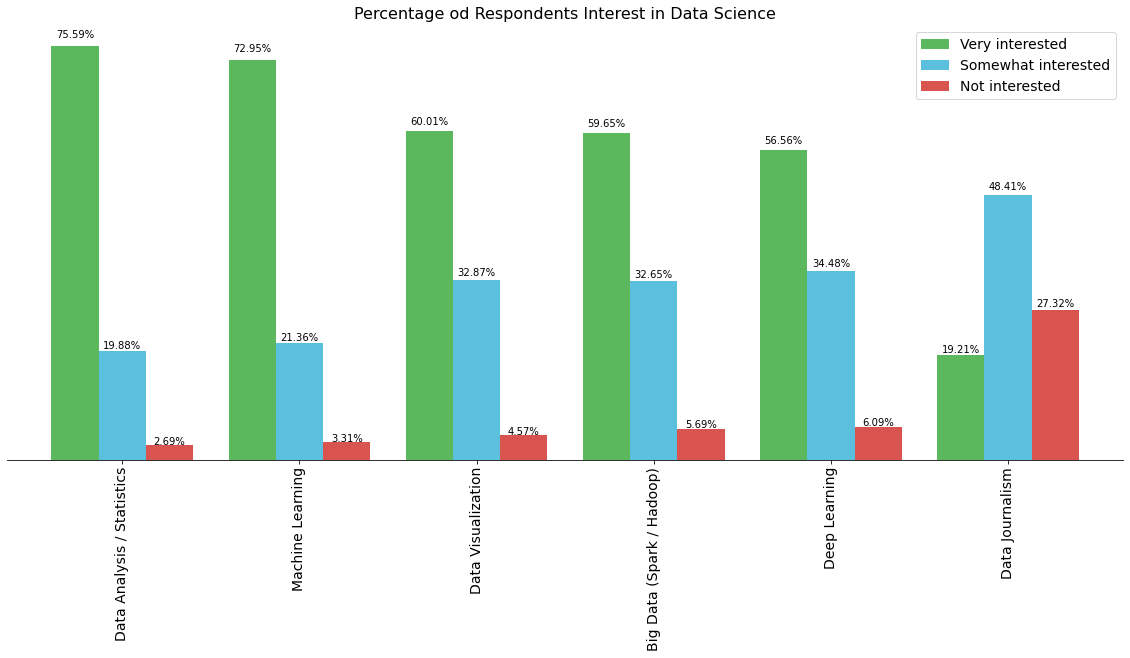

In [ ]:
ax = df_sur1.plot(kind = "bar",width = 0.8, figsize = (20,8), color=("#5cb85c","#5bc0de", "#d9534f")  , fontsize = 14)
ax.set_title("Percentage od Respondents Interest in Data Science", fontsize=16)
ax.legend(fontsize =14)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_yticks([])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(str(str(height)+ "%"), (x + width/2, y + height*1.02), ha='center')

In [ ]:
print(ax.patches)

[<matplotlib.patches.Rectangle object at 0x7f82edb89e10>, <matplotlib.patches.Rectangle object at 0x7f82edb89cd0>, <matplotlib.patches.Rectangle object at 0x7f82edb94550>, <matplotlib.patches.Rectangle object at 0x7f82edb94910>, <matplotlib.patches.Rectangle object at 0x7f82edb94e10>, <matplotlib.patches.Rectangle object at 0x7f82edb9e250>, <matplotlib.patches.Rectangle object at 0x7f82edb9e690>, <matplotlib.patches.Rectangle object at 0x7f82edb89a90>, <matplotlib.patches.Rectangle object at 0x7f82edb9ecd0>, <matplotlib.patches.Rectangle object at 0x7f82edb94dd0>, <matplotlib.patches.Rectangle object at 0x7f82edbab490>, <matplotlib.patches.Rectangle object at 0x7f82edbab250>, <matplotlib.patches.Rectangle object at 0x7f82edbabdd0>, <matplotlib.patches.Rectangle object at 0x7f82edb89c10>, <matplotlib.patches.Rectangle object at 0x7f82edbb7410>, <matplotlib.patches.Rectangle object at 0x7f82edbb7810>, <matplotlib.patches.Rectangle object at 0x7f82edbb7550>, <matplotlib.patches.Rectangle 

In [ ]:
df_sf = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Police_Department_Incidents_-_Previous_Year__2016_.zip")

In [ ]:
df_sf

IncidntNum        Category  \
0        120058272     WEAPON LAWS   
1        120058272     WEAPON LAWS   
2        141059263        WARRANTS   
3        160013662    NON-CRIMINAL   
4        160002740    NON-CRIMINAL   
...            ...             ...   
150495   161061000         ASSAULT   
150496   176000742    NON-CRIMINAL   
150497   176000758   LARCENY/THEFT   
150498   176000764   LARCENY/THEFT   
150499   179002868  OTHER OFFENSES   

                                                 Descript DayOfWeek  \
0                               POSS OF PROHIBITED WEAPON    Friday   
1          FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE    Friday   
2                                          WARRANT ARREST    Monday   
3                                           LOST PROPERTY   Tuesday   
4                                           LOST PROPERTY    Friday   
...                                                   ...       ...   
150495                                            BATTERY    Friday   
150496                                      LOST PROPERTY    Friday   
150497                            PETTY THEFT OF PROPERTY  Thursday   
150498                            GRAND THEFT OF PROPERTY    Friday   
150499  FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR P...    Friday   

                          Date   Time  PdDistrict      Resolution  \
0       01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1       01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2       04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3       01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4       01/01/2016 12:00:00 AM  00:30     MISSION            NONE   
...                        ...    ...         ...             ...   
150495  12/30/2016 12:00:00 AM  21:01        PARK            NONE   
150496  12/30/2016 12:00:00 AM  08:00     CENTRAL            NONE   
150497  12/29/2016 12:00:00 AM  20:00     CENTRAL            NONE   
150498  12/30/2016 12:00:00 AM  10:00     CENTRAL            NONE   
150499  12/02/2016 12:00:00 AM  14:00    SOUTHERN            NONE   

                         Address           X          Y  \
0         800 Block of BRYANT ST -122.403405  37.775421   
1         800 Block of BRYANT ST -122.403405  37.775421   
2          KEITH ST / SHAFTER AV -122.388856  37.729981   
3         JONES ST / OFARRELL ST -122.412971  37.785788   
4           16TH ST / MISSION ST -122.419672  37.765050   
...                          ...         ...        ...   
150495       OAK ST / STANYAN ST -122.453982  37.771428   
150496   JACKSON ST / SANSOME ST -122.401857  37.796626   
150497       PINE ST / TAYLOR ST -122.412269  37.790673   
150498  200 Block of STOCKTON ST -122.406659  37.788275   
150499    800 Block of BRYANT ST -122.403405  37.775421   

                                     Location            PdId  
0        (37.775420706711, -122.403404791479)  12005827212120  
1        (37.775420706711, -122.403404791479)  12005827212168  
2       (37.7299809672996, -122.388856204292)  14105926363010  
3       (37.7857883766888, -122.412970537591)  16001366271000  
4       (37.7650501214668, -122.419671780296)  16000274071000  
...                                       ...             ...  
150495  (37.7714278595913, -122.453981622365)  16106100004134  
150496  (37.7966261239618, -122.401857374739)  17600074271000  
150497   (37.7906727649886, -122.41226909106)  17600075806372  
150498  (37.7882745285785, -122.406658711008)  17600076406374  
150499   (37.775420706711, -122.403404791479)  17900286809024  

[150500 rows x 13 columns]

In [ ]:
df_sf.rename(columns={"IncidntNum":"Count","PdDistrict":"Neighborhood"},inplace=True)
print(df_sf.shape)
df_sf

(150500, 13)


Count        Category  \
0       120058272     WEAPON LAWS   
1       120058272     WEAPON LAWS   
2       141059263        WARRANTS   
3       160013662    NON-CRIMINAL   
4       160002740    NON-CRIMINAL   
...           ...             ...   
150495  161061000         ASSAULT   
150496  176000742    NON-CRIMINAL   
150497  176000758   LARCENY/THEFT   
150498  176000764   LARCENY/THEFT   
150499  179002868  OTHER OFFENSES   

                                                 Descript DayOfWeek  \
0                               POSS OF PROHIBITED WEAPON    Friday   
1          FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE    Friday   
2                                          WARRANT ARREST    Monday   
3                                           LOST PROPERTY   Tuesday   
4                                           LOST PROPERTY    Friday   
...                                                   ...       ...   
150495                                            BATTERY    Friday   
150496                                      LOST PROPERTY    Friday   
150497                            PETTY THEFT OF PROPERTY  Thursday   
150498                            GRAND THEFT OF PROPERTY    Friday   
150499  FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR P...    Friday   

                          Date   Time Neighborhood      Resolution  \
0       01/29/2016 12:00:00 AM  11:00     SOUTHERN  ARREST, BOOKED   
1       01/29/2016 12:00:00 AM  11:00     SOUTHERN  ARREST, BOOKED   
2       04/25/2016 12:00:00 AM  14:59      BAYVIEW  ARREST, BOOKED   
3       01/05/2016 12:00:00 AM  23:50   TENDERLOIN            NONE   
4       01/01/2016 12:00:00 AM  00:30      MISSION            NONE   
...                        ...    ...          ...             ...   
150495  12/30/2016 12:00:00 AM  21:01         PARK            NONE   
150496  12/30/2016 12:00:00 AM  08:00      CENTRAL            NONE   
150497  12/29/2016 12:00:00 AM  20:00      CENTRAL            NONE   
150498  12/30/2016 12:00:00 AM  10:00      CENTRAL            NONE   
150499  12/02/2016 12:00:00 AM  14:00     SOUTHERN            NONE   

                         Address           X          Y  \
0         800 Block of BRYANT ST -122.403405  37.775421   
1         800 Block of BRYANT ST -122.403405  37.775421   
2          KEITH ST / SHAFTER AV -122.388856  37.729981   
3         JONES ST / OFARRELL ST -122.412971  37.785788   
4           16TH ST / MISSION ST -122.419672  37.765050   
...                          ...         ...        ...   
150495       OAK ST / STANYAN ST -122.453982  37.771428   
150496   JACKSON ST / SANSOME ST -122.401857  37.796626   
150497       PINE ST / TAYLOR ST -122.412269  37.790673   
150498  200 Block of STOCKTON ST -122.406659  37.788275   
150499    800 Block of BRYANT ST -122.403405  37.775421   

                                     Location            PdId  
0        (37.775420706711, -122.403404791479)  12005827212120  
1        (37.775420706711, -122.403404791479)  12005827212168  
2       (37.7299809672996, -122.388856204292)  14105926363010  
3       (37.7857883766888, -122.412970537591)  16001366271000  
4       (37.7650501214668, -122.419671780296)  16000274071000  
...                                       ...             ...  
150495  (37.7714278595913, -122.453981622365)  16106100004134  
150496  (37.7966261239618, -122.401857374739)  17600074271000  
150497   (37.7906727649886, -122.41226909106)  17600075806372  
150498  (37.7882745285785, -122.406658711008)  17600076406374  
150499   (37.775420706711, -122.403404791479)  17900286809024  

[150500 rows x 13 columns]

In [ ]:
df3  = df_sf.groupby(["Neighborhood"]).count().reset_index()
df = df3[["Neighborhood","Count"]]
df

Neighborhood  Count
0      BAYVIEW  14303
1      CENTRAL  17666
2    INGLESIDE  11594
3      MISSION  19503
4     NORTHERN  20100
5         PARK   8699
6     RICHMOND   8922
7     SOUTHERN  28445
8      TARAVAL  11325
9   TENDERLOIN   9942

In [ ]:
df1 = df_sf[["Neighborhood","Count"]]
df1

Neighborhood      Count
0          SOUTHERN  120058272
1          SOUTHERN  120058272
2           BAYVIEW  141059263
3        TENDERLOIN  160013662
4           MISSION  160002740
...             ...        ...
150495         PARK  161061000
150496      CENTRAL  176000742
150497      CENTRAL  176000758
150498      CENTRAL  176000764
150499     SOUTHERN  179002868

[150500 rows x 2 columns]

In [ ]:
df1["Neighborhood"].value_counts().

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: Neighborhood, dtype: int64

In [ ]:
df = df1.value_counts().to_frame()
df

In [ ]:
df.columns = {"Neighborhood","Count"}

In [ ]:
!pip install folium

     |████████████████████████████████| 93 kB 3.3 MB/s  eta 0:00:01


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/san-francisco.geojson
print('GeoJSON file downloaded!')

--2020-12-29 08:17:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/san-francisco.geojson
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492672 (481K) [binary/octet-stream]
Saving to: ‘san-francisco.geojson’

san-francisco.geojs 100%[===================>] 481.12K   403KB/s    in 1.2s    

2020-12-29 08:17:53 (403 KB/s) - ‘san-francisco.geojson’ saved [492672/492672]

GeoJSON file downloaded!


In [ ]:
df1

Neighborhood      Count
0          SOUTHERN  120058272
1          SOUTHERN  120058272
2           BAYVIEW  141059263
3        TENDERLOIN  160013662
4           MISSION  160002740
...             ...        ...
150495         PARK  161061000
150496      CENTRAL  176000742
150497      CENTRAL  176000758
150498      CENTRAL  176000764
150499     SOUTHERN  179002868

[150500 rows x 2 columns]

In [ ]:
san_geo = r'san-francisco.geojson' # geojson file

In [ ]:
import folium

san_map = folium.Map(location = [37.7749, -122.4194], startzoom=12)

san_map.choropleth(
    geo_data=san_geo,
    data=df1,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate per District in San Francisco')

san_map

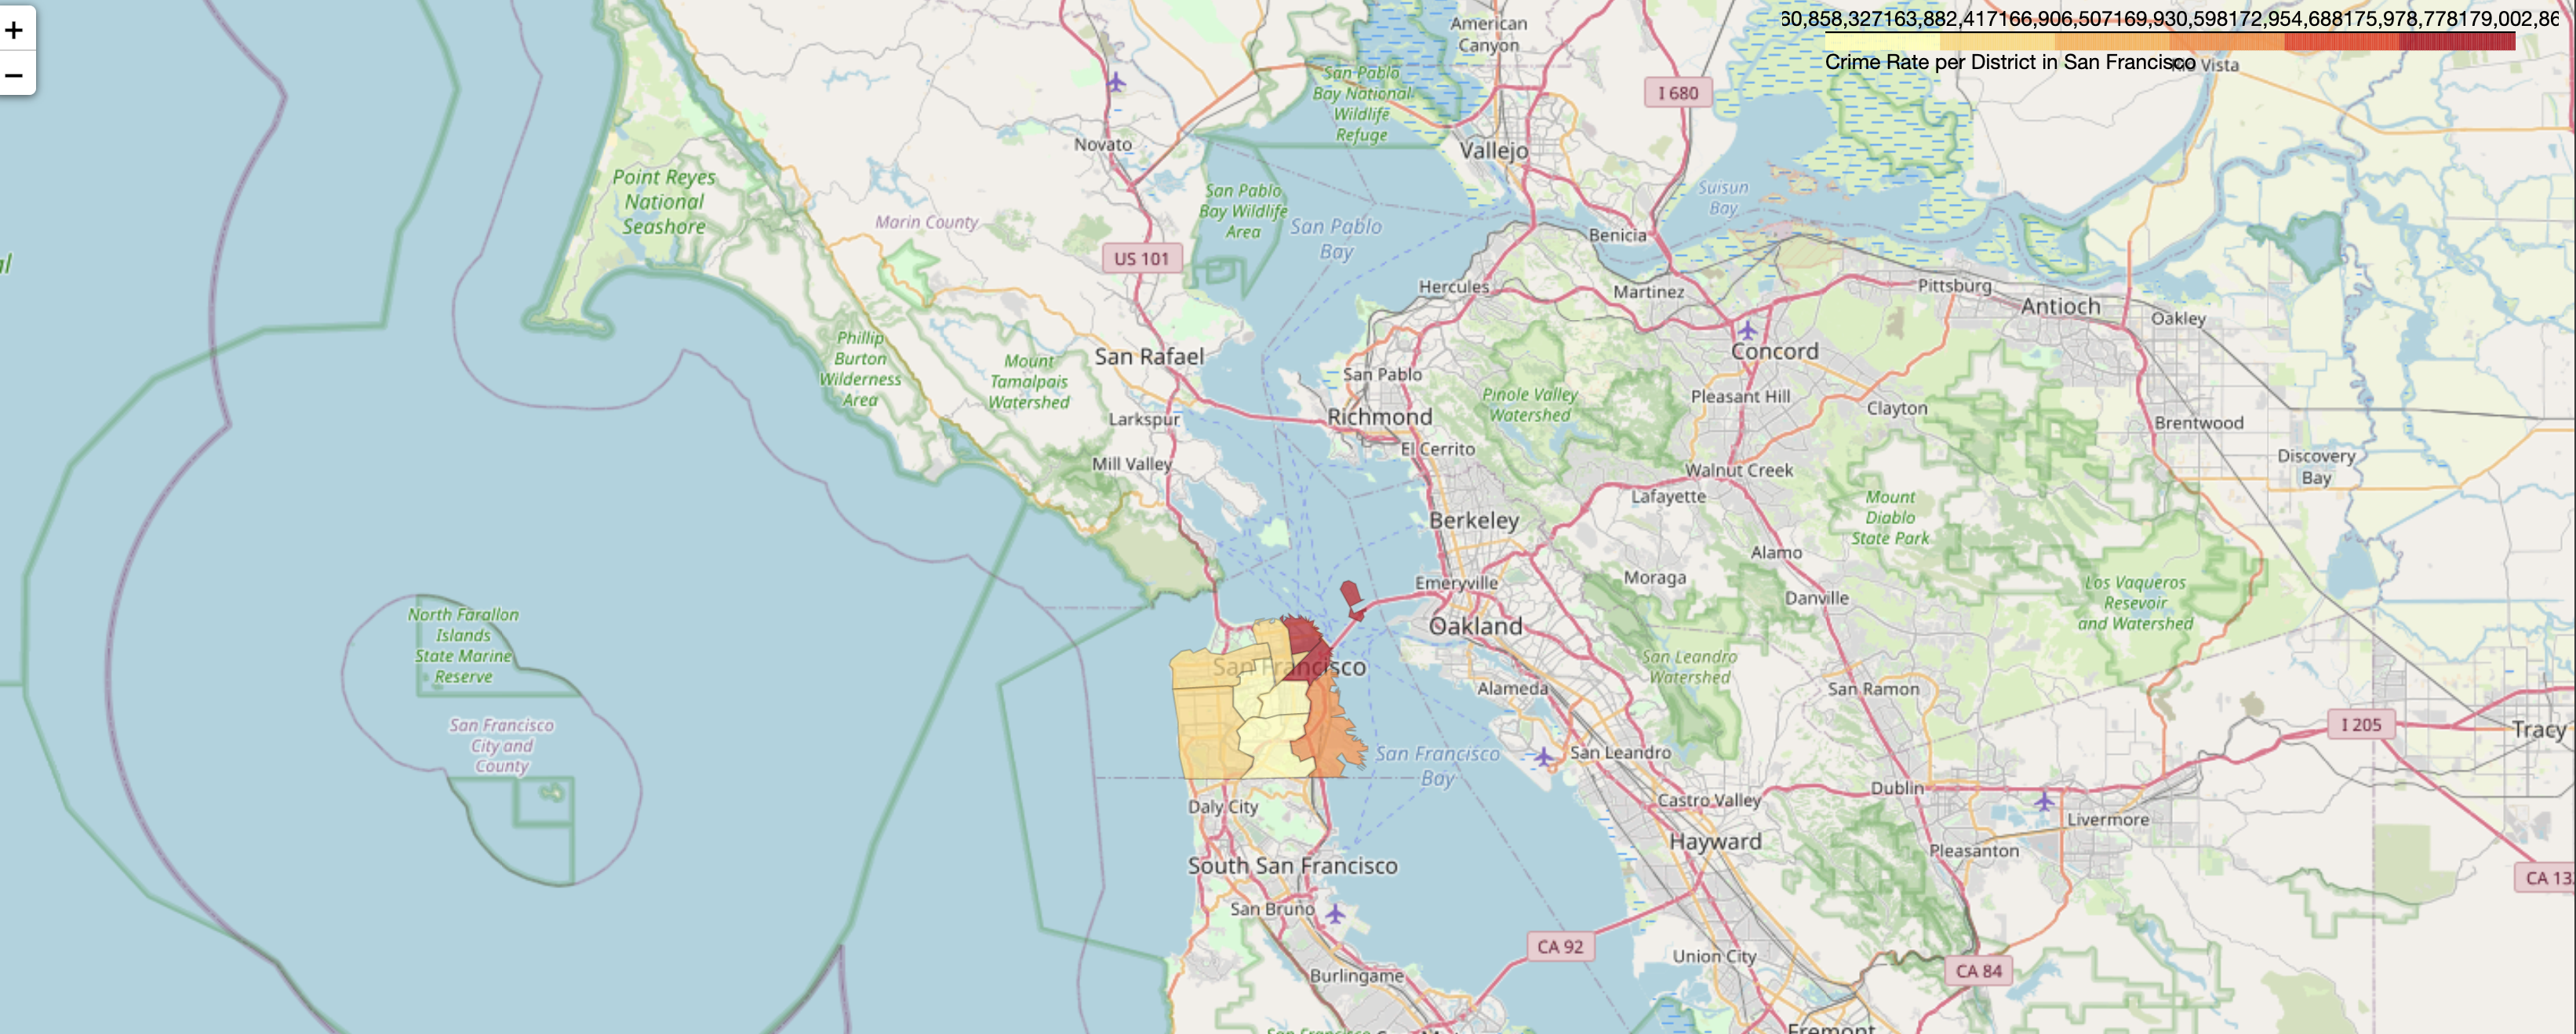